# VGG13 CNN in TensorFlow
Author: LIU Song (sliubu@connect.ust.hk)
### In this project we are going to:
<br/>
#### 1. Prepare the environment (e.g., importing the required libraries)
#### 2. Load and preprocess a dataset to train on 
#### 3. Implement a fully functioning ConvNet using TensorFlow
#### 4. Train the implemented model on the prepared dataset
#### 5. Analyze the results
<br/>
<br/>

## **1 - Preparing the environment**

As usual, we will start by loading in the packages. 

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.logging.set_verbosity(tf.logging.INFO)

%matplotlib inline
np.random.seed(1)

## **2 - Load and preprocess the dataset**

In [3]:
import tensorflow as tf
# Loading the data (signs)
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

/home/amirhf/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


As a reminder, the MNIST dataset is a collection of images representing numbers from 0 to 9.

<img src="images/mnist.jpg" style="width:800px;height:800px;">

y = 0


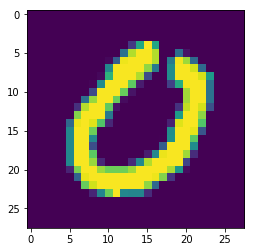

In [4]:
# Example of a picture
train_data.shape
index = 7
plt.imshow(train_data[index].reshape(28, 28))
print ("y = " + str(np.squeeze(train_labels[index])))

In [4]:
# get some statistic from the dataset
print ("number of training examples = " + str(train_data.shape[0]))
print ("number of evaluation examples = " + str(eval_data.shape[0]))
print ("X_train shape: " + str(train_data.shape))
print ("Y_train shape: " + str(train_labels.shape))
print ("X_test shape: " + str(eval_data.shape))
print ("Y_test shape: " + str(eval_labels.shape))

number of training examples = 55000
number of evaluation examples = 10000
X_train shape: (55000, 784)
Y_train shape: (55000,)
X_test shape: (10000, 784)
Y_test shape: (10000,)


Let's see one of these 3x3 filters:

## **4 - Implementing the full VGG-13 CNN network:**
<br/>
<img src="images/vgg.png" style="width:1000px;height:150px;">
<br/>
In TensorFlow, there are built-in functions that carry out the convolution steps.

- **`tf.layers.conv2d(input, num_filters, filter_size, padding='same', activation=tf.nn.relu)`:** given an input and a group of filters, this function convolves filters on the input.

- **`tf.layers.max_ppoling2d(input, pool_size, strides, padding='same')`:** given an input, this function uses a window of size `pool_size` and strides to carry out max pooling over each window.

- **`tf.contrib.layers.flatten(P)`**: given an input P, this function flattens each example into a 1D vector it while maintaining the batch-size. It returns a flattened tensor with shape [batch_size, k].

- **`tf.layers.dense(input, units, activation=tf.nn.relu)`:** given a the flattened input, it returns the output computed using a fully connected layer. The `units' determine the number of neuron in the FC layer.

In the last function above (`tf.layers.dense`), the fully connected layer automatically initializes weights in the graph and keeps on training them as you train the model. Hence, we do not need to initialize those weights.

Now we implement the `cnn_model_fn(features, labels, mode)` function below to build the following model: 
`2 x CONV2D -> RELU -> MAXPOOL -> 2 x CONV2D -> RELU -> MAXPOOL -> 2 x CONV2D -> RELU -> MAXPOOL -> 2 x CONV2D -> RELU -> MAXPOOL -> 2 x CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FC1 -> FC2 -> FC3 -> output`

In detail, we will use the following parameters for all the steps:
     - Conv2D: A 3 by 3 filter size with stride 1, padding is "same" with relu activation function
     - Max pool: A 2 by 2 filter size with stride 2, padding is "same"
     
Here is the text version of the network in the original paper:
<br/>
<img src="images/vgg-text.png" style="width:400px;height:400px;">
<br/>

In [5]:
def cnn_model_fn(features, labels, mode):
    # Input Layer
    input_height, input_width = 28, 28
    input_channels = 1
    input_layer = tf.reshape(features["x"], [-1, input_height, input_width, input_channels])

    # Convolutional Layer #1 and Pooling Layer #1
    conv1_1 = tf.layers.conv2d(inputs=input_layer, filters=64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv1_2 = tf.layers.conv2d(inputs=conv1_1, filters=64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1_2, pool_size=[2, 2], strides=2, padding="same")
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2_1 = tf.layers.conv2d(inputs=pool1, filters=128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv2_2 = tf.layers.conv2d(inputs=conv2_1, filters=128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #3 and Pooling Layer #3
    conv3_1 = tf.layers.conv2d(inputs=pool2, filters=256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv3_2 = tf.layers.conv2d(inputs=conv3_1, filters=256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool3 = tf.layers.max_pooling2d(inputs=conv3_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #4 and Pooling Layer #4
    conv4_1 = tf.layers.conv2d(inputs=pool3, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv4_2 = tf.layers.conv2d(inputs=conv4_1, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool4 = tf.layers.max_pooling2d(inputs=conv4_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #5 and Pooling Layer #5
    conv5_1 = tf.layers.conv2d(inputs=pool4, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv5_2 = tf.layers.conv2d(inputs=conv5_1, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool5 = tf.layers.max_pooling2d(inputs=conv5_2, pool_size=[2, 2], strides=2, padding="same")

    # FC Layers
    pool5_flat = tf.contrib.layers.flatten(pool5)
    FC1 = tf.layers.dense(inputs=pool5_flat, units=4096, activation=tf.nn.relu)
    FC2 = tf.layers.dense(inputs=FC1, units=4096, activation=tf.nn.relu)
    FC3 = tf.layers.dense(inputs=FC2, units=1000, activation=tf.nn.relu)

    """the training argument takes a boolean specifying whether or not the model is currently 
    being run in training mode; dropout will only be performed if training is true. here, 
    we check if the mode passed to our model function cnn_model_fn is train mode. """
    dropout = tf.layers.dropout(inputs=FC3, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Logits Layer or the output layer. which will return the raw values for our predictions.
    # Like FC layer, logits layer is another dense layer. We leave the activation function empty 
    # so we can apply the softmax
    logits = tf.layers.dense(inputs=dropout, units=10)
    
    # Then we make predictions based on raw output
    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        # the predicted class for each example - a vlaue from 0-9
        "classes": tf.argmax(input=logits, axis=1),
        # to calculate the probablities for each target class we use the softmax
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    # so now our predictions are compiled in a dict object in python and using that we return an estimator object
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    
    '''Calculate Loss (for both TRAIN and EVAL modes): computes the softmax entropy loss. 
    This function both computes the softmax activation function as well as the resulting loss.'''
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Options (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels,
                                        predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=loss,
                                      eval_metric_ops=eval_metric_ops)

## Training

In [6]:
# Create the Estimator
mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn,
                                          model_dir="/tmp/mnist_vgg13_model")

# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": train_data},
                                                    y=train_labels,
                                                    batch_size=100,
                                                    num_epochs=100,
                                                    shuffle=True)
mnist_classifier.train(input_fn=train_input_fn,
                       steps=None,
                       hooks=None)

# Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": eval_data},
                                                   y=eval_labels,
                                                   num_epochs=1,
                                                   shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_tf_random_seed': None, '_task_id': 0, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_master': '', '_save_checkpoints_steps': None, '_task_type': 'worker', '_session_config': None, '_model_dir': '/tmp/mnist_vgg13_model', '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f33766724a8>, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_service': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/mnist_vgg13_model/model.ckpt.
INFO:tensorflow:loss = 2.3024457, step = 1
INFO:tensorflow:global_step/sec: 33.3624
INFO:tensorflow:loss = 2.3024359, step = 101 (2.999 sec)
INFO:tensorflow:global_step/sec: 34.6312
INFO:tensorflow:loss = 2.3019745, step = 201 (2.887 sec)
INFO:tensorflow:global_step/sec: 34.5752
INFO:tenso